In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import locale
import pixiedust
import math

Pixiedust database opened successfully


In [3]:
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')

'en_US.UTF-8'

In [4]:
# always display all columns in the dataframe 
pd.options.display.max_columns = None

In [5]:
#function for removing the commas from the database

def my_containsAny(str, set):
    for c in set:
        if c in str: return 1;
    return 0

def remove_commas(df):
    for column in df:
        index = -1
        for i in df[column]:
            index = index +  1
            if type(i) == str:
                #print("this is a string: " + i)
                if my_containsAny(i, ',') == 1:
                    #print("replacing the commas in this string: ", i)
                    i = i.replace(',', '')
                    #print("this no longer has commas: " + i)
                    i = float(i)
                    #print("this was a string but now it is a float: %f, " % (i) )
                    df[column][index] = i
                else: 
                    i = float(i)
                    df[column][index] = i
                    #print("this was a string  but now it is a float: %f" % (i) )
            else:
                print(i)
    return 
# print(df[column])

## Primary Education Statistics

In [6]:
df_prim_educ = pd.read_csv('primary_educ_1978.csv')
df_prim_educ.head()

,Back to Table of Contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105
0,Table 2.1 - Primary Enrolment and Gross Enrolm...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year,Island of Mauritius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Island of Rodrigues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Republic of Mauritius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Enrolment,NaN,NaN,Population (6 - 11),NaN,NaN,Gross Enrolment Ratio,NaN,NaN,Enrolment,NaN,NaN,Population (6 - 11),NaN,NaN,Gross Enrolment Ratio,NaN,NaN,Enrolment,NaN,NaN,Population (6 - 11),NaN,NaN,Gross Enrolment Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# dropping all rows and columns without data 
df_prim_educ.dropna(axis = 0, how = 'all', inplace = True)
df_prim_educ.dropna(axis = 1, how = 'all', inplace = True)
df_prim_educ.drop(labels= [0, 4, 2, 3, 51], inplace = True)

# only looking at data from the island of Mauritius because it has a longer history 
df_prim_educ.drop(df_prim_educ.columns[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1, inplace=True)

# reset the index to be years
df_prim_educ.set_index('Back to Table of Contents', inplace = True)
df_prim_educ.index.rename('Years', inplace = True)

# define a new dictionary to hold the new names of the columns 
newcolumns = [('Enrolment_Total'), ('Enrolment_Male'), ('Enrolment_Female'),
                          ('Pop_Total'), ('Pop_Male'), ('Pop_Female'),
                          ('Ratio_Total'), ('Ratio_Male'), ('Ratio_Female')]
newdict = dict(zip(df_prim_educ.columns, newcolumns))

# rename the columns
df_prim_educ.rename(columns = newdict, inplace = True)

# remove the commas and set strings in the dataframe as floats 
remove_commas(df_prim_educ)

# save to csv
df_prim_educ.to_csv('PrimEduRatio.csv')

display(df_prim_educ)


,Enrolment_Total,Enrolment_Male,Enrolment_Female,Pop_Total,Pop_Male,Pop_Female,Ratio_Total,Ratio_Male,Ratio_Female
Years,,,,,,,,,
1972,151614,77401,74213,142800,72239,70561,106,107,105
1973,150656,76812,73844,142695,72107,70588,106,107,105
1974,148142,75546,72596,139965,70663,69302,106,107,105
1975,145475,74220,71255,135568,68351,67217,107,109,106
1976,139439,71077,68362,131453,66368,65085,106,107,105
1977,136019,69425,66594,126492,63838,62654,108,109,106
1978,133432,68456,64976,120768,60828,59940,110,113,108
1979,125165,63931,61234,116539,58582,57957,107,109,106
1980,123710,63203,60507,114400,57328,57072,108,110,106


#### Primary School Enrolment vs Total Population of Primary Aged Students

<function matplotlib.pyplot.show(*args, **kw)>

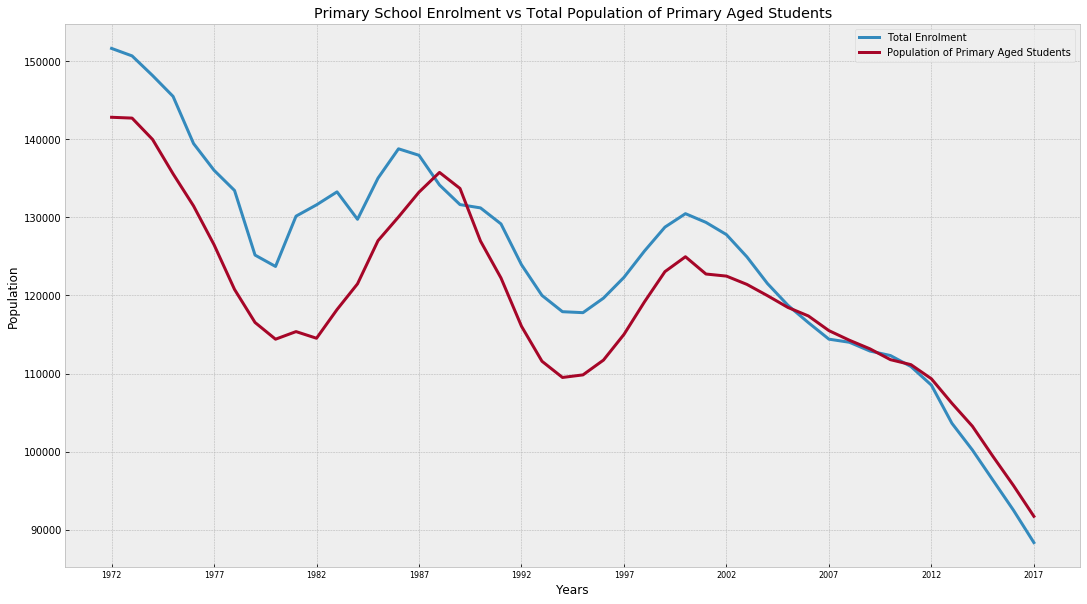

In [8]:
# why is the enrolment greater than the pop at certain times?
x = df_prim_educ.index
y = df_prim_educ['Enrolment_Total']
z = df_prim_educ['Pop_Total']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z, linewidth = 3)
plt.legend(['Total Enrolment', 'Population of Primary Aged Students'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Primary School Enrolment vs Total Population of Primary Aged Students')
plt.show


#### Male vs Female Primary School Enrolment

<function matplotlib.pyplot.show(*args, **kw)>

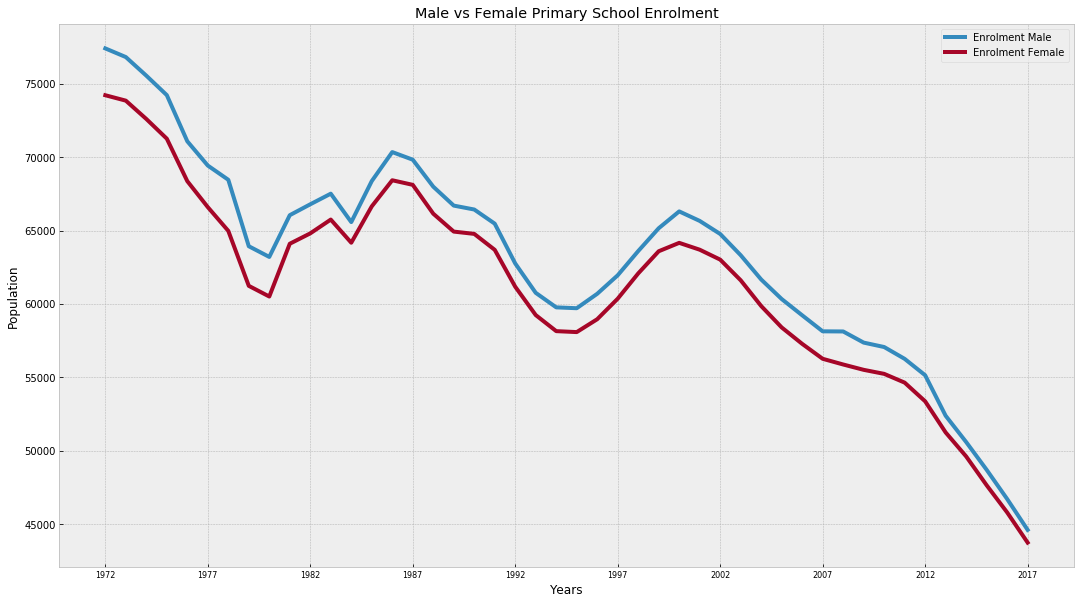

In [9]:
x = df_prim_educ.index
y = df_prim_educ['Enrolment_Male']
z = df_prim_educ['Enrolment_Female']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z, linewidth = 4)
plt.legend(['Enrolment Male','Enrolment Female'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Male vs Female Primary School Enrolment')
plt.show

#### Ratios of Male vs Female Primary Enrolment

<function matplotlib.pyplot.show(*args, **kw)>

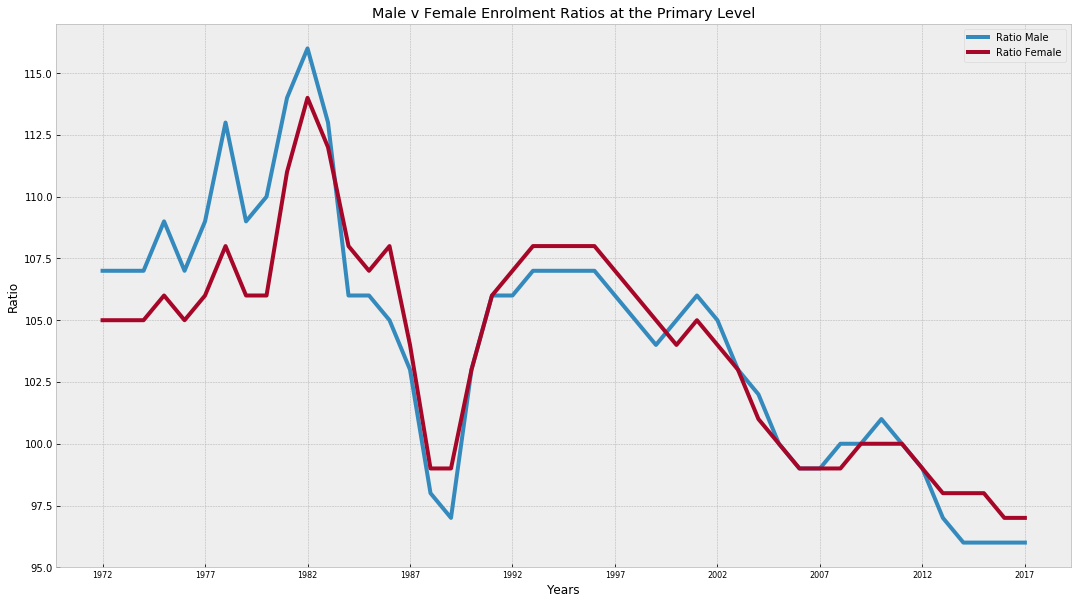

In [10]:
x = df_prim_educ.index
y = df_prim_educ['Ratio_Male']
z = df_prim_educ['Ratio_Female']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z, linewidth = 4)
plt.legend(['Ratio Male','Ratio Female'])
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.title('Male v Female Enrolment Ratios at the Primary Level')
plt.show

## Secondary Education Statistics

In [11]:
df_sec_educ = pd.read_csv('sec_educ_ratio.csv')
df_sec_educ.head()

,Back to Table of Contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Table 3.1 - Secondary Enrolment and Gross Enro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year,Island of Mauritius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Island of Rodrigues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Republic of Mauritius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Enrolment,NaN,NaN,Population (12 - 19),NaN,NaN,Gross Enrolment Ratio,NaN,NaN,Enrolment,NaN,NaN,Population (12 - 19),NaN,NaN,Gross Enrolment Ratio,NaN,NaN,Enrolment,NaN,NaN,Population (12 - 19),NaN,NaN,Gross Enrolment Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# dropping all rows and columns without data 
df_sec_educ.dropna(axis = 0, how = 'all', inplace = True)
df_sec_educ.dropna(axis = 1, how = 'all', inplace = True)
df_sec_educ.drop(labels=[0, 1, 4, 2, 3, 51], inplace = True)

# only looking at data from the island of Mauritius because it has a longer history 
df_sec_educ.drop(df_sec_educ.columns[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1, inplace=True)

# reset the index
df_sec_educ.set_index('Back to Table of Contents', inplace = True)
df_sec_educ.index.rename('Years', inplace = True)

# rename the columns using a dict defined previously 
df_sec_educ.rename(columns = newdict, inplace = True)

# remove commas and turn strings to floats 
remove_commas(df_sec_educ)

# save to csv
df_sec_educ.to_csv('SecEduRatio.csv')

df_sec_educ

,Enrolment_Total,Enrolment_Male,Enrolment_Female,Pop_Total,Pop_Male,Pop_Female,Ratio_Total,Ratio_Male,Ratio_Female
Years,,,,,,,,,
1972,52030,30551,21479,165855,83038,82817,31,37,26
1973,55619,31929,23690,166604,83612,82992,33,38,29
1974,60116,33815,26301,171247,86099,85148,35,39,31
1975,63142,35112,28030,174930,88210,86720,36,40,32
1976,66920,36616,30304,178280,89864,88416,38,41,34
1977,78038,41905,36133,180190,90786,89404,43,46,40
1978,80479,42367,38112,182792,92070,90722,44,46,42
1979,81946,43257,38689,182550,91591,90959,45,47,43
1980,80881,41717,39164,181823,90799,91024,44,46,43


#### Enrolment vs Total Population of Secondary-School Aged Students

<function matplotlib.pyplot.show(*args, **kw)>

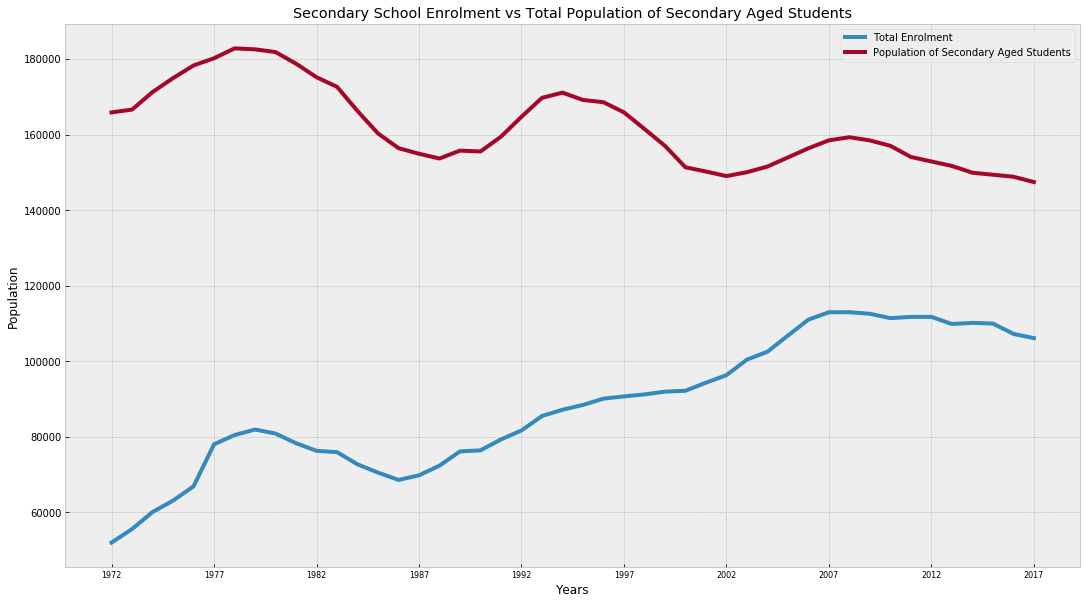

In [13]:
x = df_prim_educ.index
y = df_sec_educ['Enrolment_Total']
z = df_sec_educ['Pop_Total']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z, linewidth = 4)
plt.legend(['Total Enrolment','Population of Secondary Aged Students'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Secondary School Enrolment vs Total Population of Secondary Aged Students')
plt.show

#### Male vs Female Secondary School Enrolment

<function matplotlib.pyplot.show(*args, **kw)>

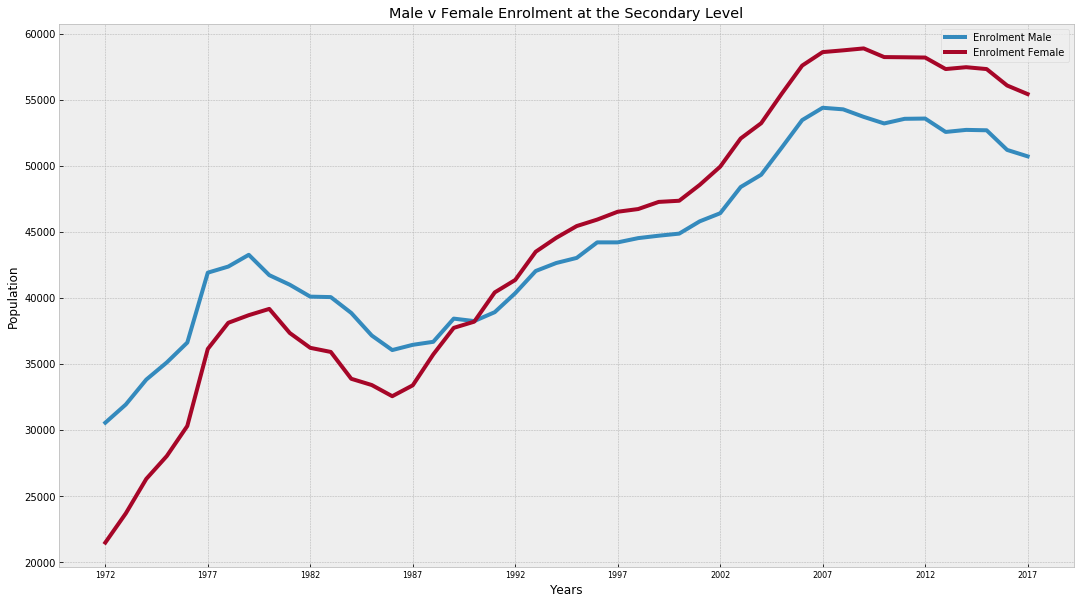

In [14]:
x = df_sec_educ.index
y = df_sec_educ['Enrolment_Male']
z = df_sec_educ['Enrolment_Female']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z, linewidth = 4)
plt.legend(['Enrolment Male','Enrolment Female'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Male v Female Enrolment at the Secondary Level')
plt.show

#### Ratios of Male vs Female Secondary Enrolment

<function matplotlib.pyplot.show(*args, **kw)>

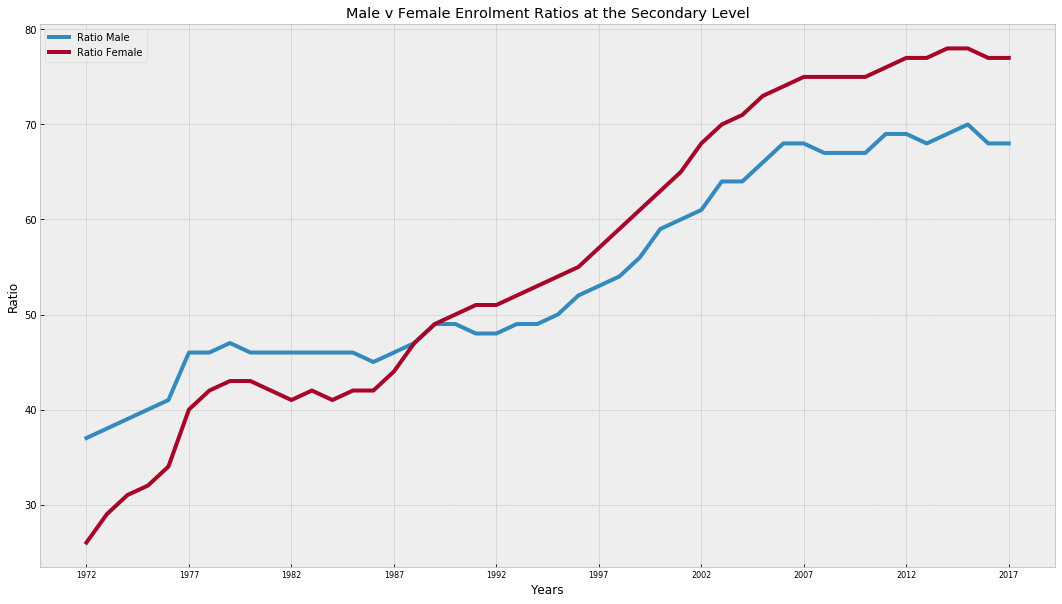

In [15]:
x = df_sec_educ.index
y = df_sec_educ['Ratio_Male']
z = df_sec_educ['Ratio_Female']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z, linewidth = 4)
plt.legend(['Ratio Male','Ratio Female'])
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.title('Male v Female Enrolment Ratios at the Secondary Level')
plt.show

## Tertiary Education Statistics

In [16]:
# total enrolment in secondary institutions 
df_ter_educ = pd.read_csv('tertiary_educ_2001.csv')
df_ter_educ.head()

,Back to Table of Contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Table 8.1 - Total Enrolment on Tertiary Educat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year,Public Funded Institutions,NaN,NaN,Private,NaN,NaN,Overseas,NaN,NaN,Total,NaN,NaN,NaN
3,NaN,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,NaN
4,2000,"4,185","4,872","9,057","2,522","2,733","5,255","1,087","1,336","2,423","7,794","8,941","16,735",NaN


In [17]:
# dropping all rows and columns without data 
df_ter_educ.dropna(axis = 0, how = 'all', inplace = True)
df_ter_educ.dropna(axis = 1, how = 'all', inplace = True)
df_ter_educ.drop(labels=[0, 2, 3, 21], inplace = True)


# reset the index
df_ter_educ.set_index('Back to Table of Contents', inplace = True)
df_ter_educ.index.rename('Years', inplace = True)

# define a new dictionary to hold the new names of the columns 
newcolumns2 = [('Public_Male'), ('Public_Female'),('Public_Total'),
               ('Private_Male'), ('Private_Female'),('Private_Total'),
               ('Overseas_Male'), ('Overseas_Female'), ('Overseas_Total'),
               ('Overall_Male'), ('Overall_Female'),('Overall_Total')]
newdict2 = dict(zip(df_ter_educ.columns, newcolumns2))

# rename the columns 
df_ter_educ.rename(columns = newdict2, inplace = True)

# remove commas and turn strings to floats 
remove_commas(df_ter_educ)

# save to csv
df_ter_educ.to_csv('TerEduRatio.csv')

df_ter_educ


,Public_Male,Public_Female,Public_Total,Private_Male,Private_Female,Private_Total,Overseas_Male,Overseas_Female,Overseas_Total,Overall_Male,Overall_Female,Overall_Total
Years,,,,,,,,,,,,
2000,4185,4872,9057,2522,2733,5255,1087,1336,2423,7794,8941,16735
2001,5025,5996,11021,2928,3172,6100,1365,1654,3019,9318,10822,20140
2002,4856,5024,9880,3476,3766,7242,2146,2645,4791,10478,11435,21913
2003,6403,6307,12710,3603,3904,7507,2464,3004,5468,12470,13215,25685
2004,5625,6088,11713,3607,3908,7515,2968,3878,6846,12200,13874,26074
2005,6597,6800,13397,3893,4217,8110,3265,4092,7357,13755,15109,28864
2006,7140,8324,15464,4461,4832,9293,3621,4852,8473,15222,18008,33230
2007,6808,9072,15880,4614,4998,9612,4139,5392,9531,15561,19462,35023
2008,7316,10056,17372,4801,5202,10003,4827,6421,11248,16944,21679,38623


#### Division of Enrolment in Tertiary Institutions

In [18]:
years = list(range(2000, 2017, 1))

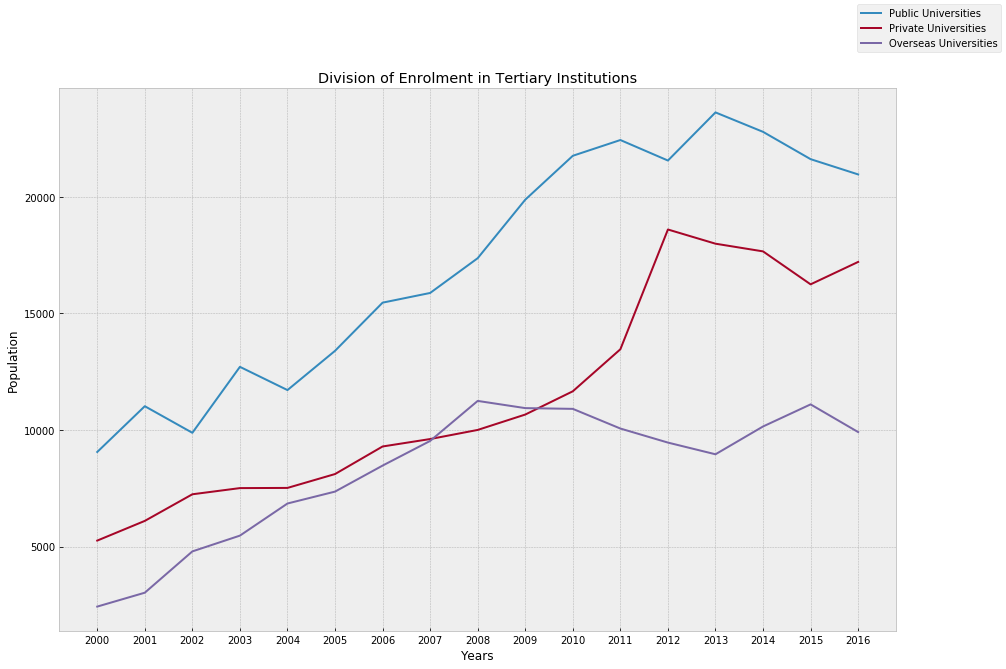

In [19]:
fig = plt.figure(figsize=(15,10), linewidth = 4)
#df_ter_educ[['Public_Total', 'Private_Total', 'Overseas_Total']].plot(figsize=(25,10), linewidth = 4, legend = False,)
plt.plot(df_ter_educ.index, df_ter_educ['Public_Total'])
plt.plot(df_ter_educ.index, df_ter_educ['Private_Total'])
plt.plot(df_ter_educ.index, df_ter_educ['Overseas_Total'])


plt.figlegend(['Public Universities', 'Private Universities', 'Overseas Universities'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Division of Enrolment in Tertiary Institutions')
plt.show()


#### Gender Comparison of Enrolment in Tertiary Institutions

<function matplotlib.pyplot.show(*args, **kw)>

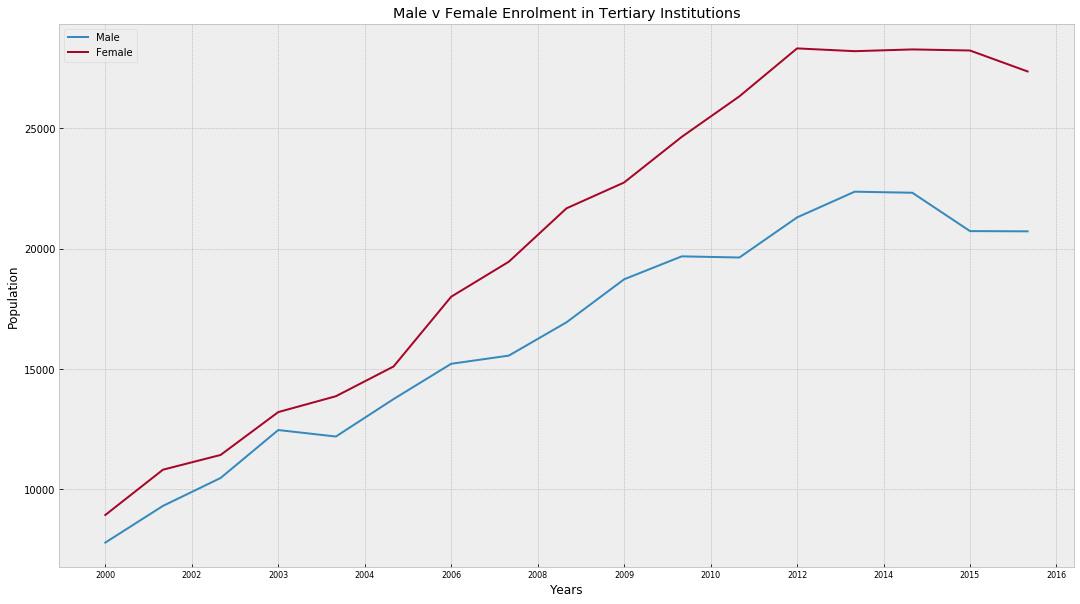

In [20]:
x = df_ter_educ.index
y = df_ter_educ['Overall_Male']
z = df_ter_educ['Overall_Female']



fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(16))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z)

plt.legend(['Male','Female'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Male v Female Enrolment in Tertiary Institutions')
plt.show

In [21]:
# saving dataframes as pickle files
df_ter_educ.to_pickle('df_ter_educ.pkl')
df_sec_educ.to_pickle('df_sec_educ.pkl')
df_prim_educ.to_pickle('df_prim_educ.pkl')